In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
##Helper functions. Use when needed. 
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()





In [3]:
## Step 1: Read dataset and visualize it
df  = pd.read_csv("C:/Users/Akash/Documents/Face_Recognition_Using_PCA/face_data.csv")

(400, 4096)


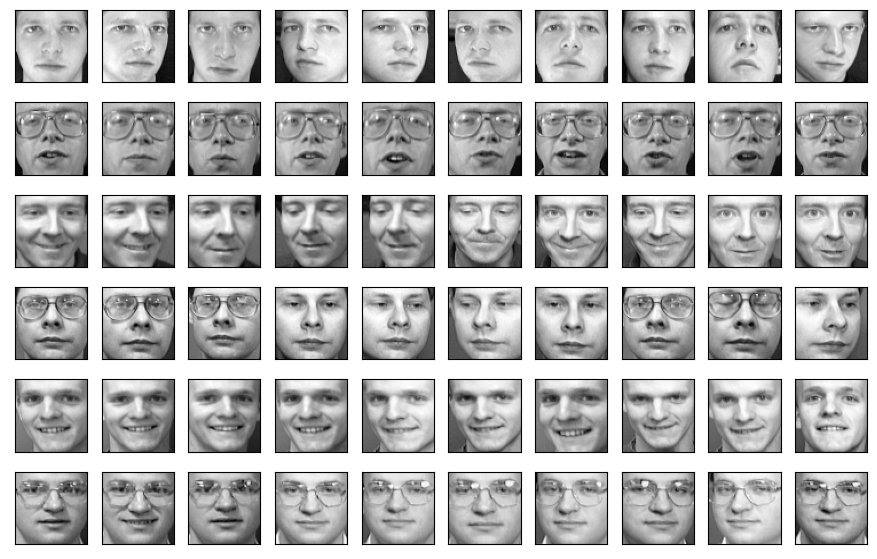

In [4]:
targets = df["target"]
pixels = df.drop(["target"],axis=1)

print(np.array(pixels).shape)

show_orignal_images(pixels)

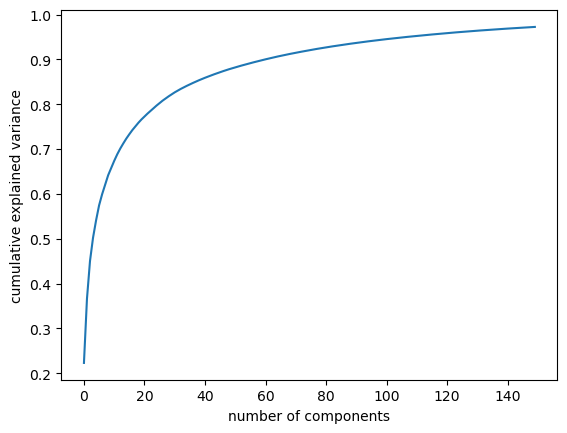

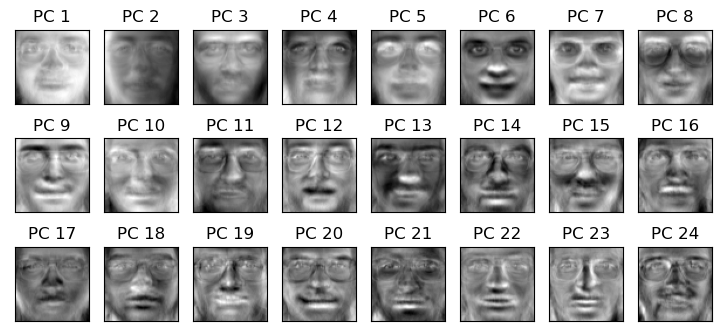

In [5]:
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

## Step 3: Perform PCA.
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
show_eigenfaces(pca)



In [6]:


## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

##############

Projecting the input data on the eigenfaces orthonormal basis


In [7]:
## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)


## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.109s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00 